<a href="https://colab.research.google.com/github/nahumsa/Self-Avoiding-Walks/blob/master/Monte%20Carlo%20Integration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Monte Carlo Integration

In Monte Carlo Integration we sample from an interval $\{a,b\}$ and see if it is inside the region between the function and the x axis, if this condition is satisfied we accept the sample, otherwise we discart the sample.

Consider that you want to estimate the following integral:

$$
\int_a^b f(x) dx
$$

The procedure can be summarized as follows: 

- 1) Draw a uniform sample from the interval $x \sim \{a,b\}$ and a uniform sample from $y \sim \{0, \max (f(\{a,b\})\}$, where $\max (f(\{a,b\})$ is the maximum value of the function inside the interval $\{a, b\}$ ;

- 2) Evaluate f(x) and if $f(x) > y$ discard the sample, otherwise accept the sample.

On average you will have the number of samples that satisfies your constraints, then you take the average and multiply for the area of your given interval:

$$
A = (\max (f(\{a,b\})\} - 0)*(b-a)
$$

Thus:

$$
\int_a^b f(x) dx = A* \mathbb{E}(\mathrm{Accepted \ counts})
$$


In [13]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

In [4]:
def mc_integration(x_init, x_final, func, n=100000):
  """ Function to do monte carlo integration for 
      n samples.

  Parameters
  -----------------------------------------------
  x_init(float): Starting point of integration.
  x_final(float): Ending point of integration.
  func(function): Python function that you want to integrate.
  n(int): Number of samples.

  """

  X = np.linspace(x_init, x_final, 1000)
  y1 = 0
  # Overshoot by 1 for convergence
  y2 = max((func(X))) + 1
      
  area = (x_final-x_init)*(y2-y1)
  check = []
  xs = []
  ys = []

  for _ in range(n):
      
      # Generate Samples
      x = np.random.uniform(x_init,x_final,1)
      xs.append(float(x))
      
      y = np.random.uniform(y1,y2,1)
      ys.append(float(y))
      
      # Reject
      if abs(y) > abs(func(x)) or y<0:
          check.append(0)
      
      # Accept
      else:
          check.append(1)

  return np.mean(check)*area, xs, ys, check

## Application 1: $$f(x) = \sin x$$
Let's try with a simple function: 

$$
f(x) = \sin x
$$

And compare with the integration used on scipy.

In [5]:
def f(x):
  return np.sin(x)

In [6]:
from scipy.integrate import quad

a = 0.3
b = 2.5

sol, xs, ys, check = mc_integration(a, b, f, n=1000000)
id_sol, _ = quad(f, a, b)

print(f'Monte Carlo Solution: {sol}')
print(f'Quad Solution: {id_sol}')
print(f'Error: {np.square(sol - id_sol)}')

Monte Carlo Solution: 1.7552919930712214
Quad Solution: 1.7564801046725398
Error: 1.4116091771873149e-06


Let's see what is happening when we are doing this procedure, the red dots are rejected and blue dots are accepted and we have the plot of our function in blue.

We see that we sampled a lot of points in this interval such that we almost filled the area.

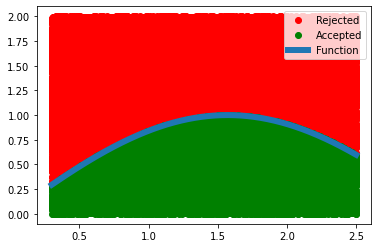

In [8]:
check = np.array(check)
xs = np.array(xs)
ys = np.array(ys)
plt.plot(xs[check == 0], ys[check == 0], 'ro', label='Rejected')
plt.plot(xs[check == 1], ys[check == 1], 'go', label='Accepted')
x = np.linspace(a,b, 100000)

plt.plot(x, f(x), label='Function', linewidth=6)
plt.legend()
plt.show()

Let's check the convergence of our method

In [ ]:
err = []

n = np.linspace(10, 10000, 100)

for i in tqdm(n):  
  sol, *_ = mc_integration(a, b, f, n=int(i))
  err.append(np.square(sol - id_sol))

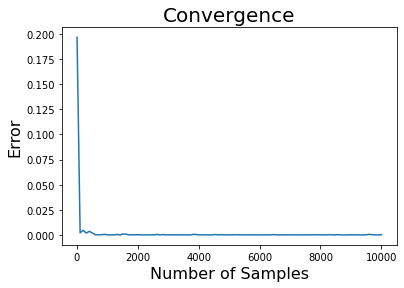

In [19]:
plt.plot(n, err)
plt.title("Convergence", size=20)
plt.xlabel("Number of Samples", size=16)
plt.ylabel("Error", size=16)
plt.show()

## Application 2: $$f(x) = \frac{\sin x}{x^2}$$

In [30]:
def f(x):
  return np.sin(x)/(x**2)

In [31]:
from scipy.integrate import quad

a = 0.3
b = 5

sol, xs, ys, check = mc_integration(a, b, f, n=1000000)
id_sol, _ = quad(f, a, b)

print(f'Monte Carlo Solution: {sol}')
print(f'Quad Solution: {id_sol}')
print(f'Error: {np.square(sol - id_sol)}')

Monte Carlo Solution: 1.773632401526077
Quad Solution: 1.635995393784945
Error: 0.01894394589993242


Let's see what is happening when we are doing this procedure, the red dots are rejected and blue dots are accepted and we have the plot of our function in blue.

We see that we sampled a lot of points in this interval such that we almost filled the area.

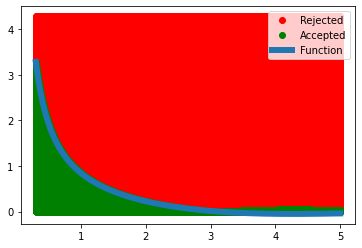

In [32]:
check = np.array(check)
xs = np.array(xs)
ys = np.array(ys)
plt.plot(xs[check == 0], ys[check == 0], 'ro', label='Rejected')
plt.plot(xs[check == 1], ys[check == 1], 'go', label='Accepted')
x = np.linspace(a, b, 100000)

plt.plot(x, f(x), label='Function', linewidth=6)
plt.legend()
plt.show()

Let's check the convergence of our method

In [35]:
err = []

n = np.linspace(10, 10000, 100)

for i in tqdm(n):  
  sol, *_ = mc_integration(a, b, f, n=int(i))
  err.append(np.square(sol - id_sol))

100%|██████████| 100/100 [00:06<00:00, 15.33it/s]


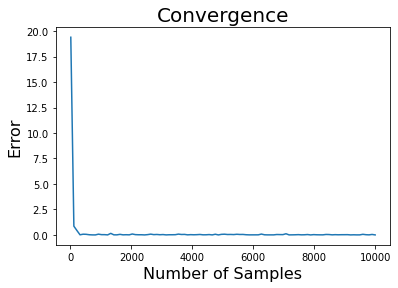

In [36]:
plt.plot(n, err)
plt.title("Convergence", size=20)
plt.xlabel("Number of Samples", size=16)
plt.ylabel("Error", size=16)
plt.show()

# Conclusion

By learning the method of Monte Carlo Integration you have learned a powerful tool that can be generalized for other problems such as Sequential Monte Carlo and Markov Chain Monte Carlo (MCMC).